In [171]:
import pandas as pd
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

In [172]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [173]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error

In [174]:
def preprocessing(df, remove_date=False):
    
    ## preprocessing
    
    df = df.dropna()
    # Convert 'date' to datetime and extract useful features (e.g., year, month, day)
    df['date'] = pd.to_datetime(df['date'])
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day

    # Drop unnecessary columns
    if remove_date:
        df = df.drop(columns=['id', 'date'])
    else:
        df = df.drop(columns=['id'])

    # One-hot encode categorical variables
    df = pd.get_dummies(df, columns=['country', 'store', 'product'], drop_first=True)

    return df

In [175]:
df_p = preprocessing(train_data)
df_p.head(3)

/tmp/ipykernel_3876/513233812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_3876/513233812.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
/tmp/ipykernel_3876/513233812.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,date,num_sold,year,month,day,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,2010-01-01,973.0,2010,1,1,False,False,False,False,False,False,False,True,False,False,False
2,2010-01-01,906.0,2010,1,1,False,False,False,False,False,False,False,False,True,False,False
3,2010-01-01,423.0,2010,1,1,False,False,False,False,False,False,False,False,False,True,False


In [203]:
def test_train_split(df, test_size=0.2):

    # Calculate the cutoff date
    cutoff_date = df['date'].iloc[int((1 - test_size) * len(df))]
    
    # Split the data based on the cutoff date
    train = df[df['date'] < cutoff_date]  # All rows before the cutoff date
    test = df[df['date'] >= cutoff_date]  # All rows on or after the cutoff date 

    # Separate features (X) and target (y)
    X_train = train.drop(columns=['num_sold', 'date'])
    y_train = train['num_sold']

    X_test = test.drop(columns=['num_sold', 'date'])
    y_test = test['num_sold']

    print(f"Train length: {len(train)}")
    print(f"Test length: {len(test)}")
    print("Training set date range:", train['date'].min(), "to", train['date'].max())
    print("Testing set date range:", test['date'].min(), "to", test['date'].max())

    return X_train, X_test, y_train, y_test

In [204]:
X_train, X_test, y_train, y_test = test_train_split(df_p, test_size=0.2)

Train length: 176962
Test length: 44297
Training set date range: 2010-01-01 00:00:00 to 2015-08-09 00:00:00
Testing set date range: 2015-08-10 00:00:00 to 2016-12-31 00:00:00


In [205]:
def train_model(X_train, X_test, y_train):
    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    return y_pred

In [206]:
def eval_model(y_test, y_pred):

    # Calculate evaluation metrics
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    print(f"Mean Absolute Percentage Error (MAPE): {mape}")

In [207]:
df_pre = preprocessing(train_data)
X_train, X_test, y_train, y_test = test_train_split(df_pre)
y_pred = train_model(X_train, X_test, y_train)
eval_model(y_test, y_pred)

Train length: 176962
Test length: 44297
Training set date range: 2010-01-01 00:00:00 to 2015-08-09 00:00:00
Testing set date range: 2015-08-10 00:00:00 to 2016-12-31 00:00:00
Mean Absolute Percentage Error (MAPE): 4.785188808498222


/tmp/ipykernel_3876/513233812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_3876/513233812.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
/tmp/ipykernel_3876/513233812.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [208]:
X_train

,year,month,day,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
1,2010,1,1,False,False,False,False,False,False,False,True,False,False,False
2,2010,1,1,False,False,False,False,False,False,False,False,True,False,False
3,2010,1,1,False,False,False,False,False,False,False,False,False,True,False
4,2010,1,1,False,False,False,False,False,False,False,False,False,False,True
5,2010,1,1,False,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184225,2015,8,9,False,False,False,False,True,True,False,False,False,False,False
184226,2015,8,9,False,False,False,False,True,True,False,True,False,False,False
184227,2015,8,9,False,False,False,False,True,True,False,False,True,False,False
184228,2015,8,9,False,False,False,False,True,True,False,False,False,True,False


In [210]:
X_test

,year,month,day,country_Finland,country_Italy,country_Kenya,country_Norway,country_Singapore,store_Premium Sticker Mart,store_Stickers for Less,product_Kaggle,product_Kaggle Tiers,product_Kerneler,product_Kerneler Dark Mode
184231,2015,8,10,False,False,False,False,False,False,False,True,False,False,False
184232,2015,8,10,False,False,False,False,False,False,False,False,True,False,False
184233,2015,8,10,False,False,False,False,False,False,False,False,False,True,False
184234,2015,8,10,False,False,False,False,False,False,False,False,False,False,True
184236,2015,8,10,False,False,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230125,2016,12,31,False,False,False,False,True,True,False,False,False,False,False
230126,2016,12,31,False,False,False,False,True,True,False,True,False,False,False
230127,2016,12,31,False,False,False,False,True,True,False,False,True,False,False
230128,2016,12,31,False,False,False,False,True,True,False,False,False,True,False


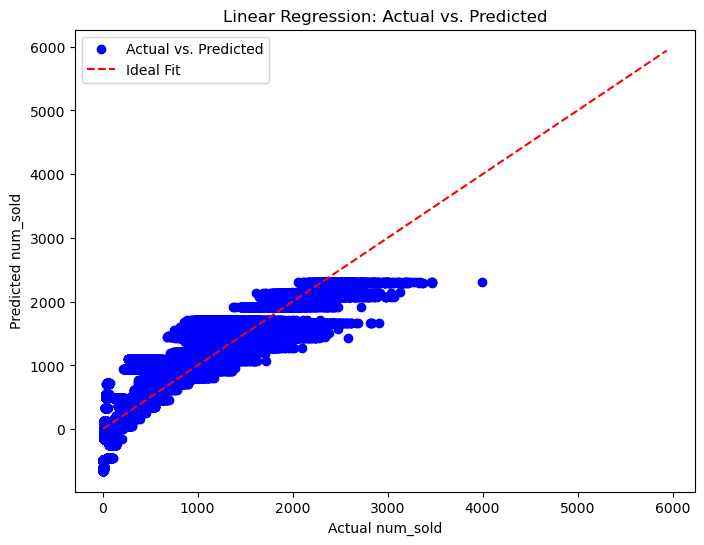

In [86]:
# Plot actual vs. predicted values
y = pd.concat([y_train, y_test])

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Actual vs. Predicted')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.xlabel('Actual num_sold')
plt.ylabel('Predicted num_sold')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend()
plt.show()

In [238]:
def run_model_on_test(train_data, test_data, save_path="submission.csv"):
    train_data_pp =  preprocessing(train_data, remove_date=False)
    test_data_pp = preprocessing(test_data, remove_date=True)

    X = train_data_pp.drop(columns=['num_sold', 'date'])
    y = train_data_pp['num_sold']
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(test_data_pp)

    submission = pd.DataFrame(data={'num_sold': y_pred}, index=test_data["id"])
    if save_path:
        submission.to_csv(save_path)
    return submission
    

    

In [239]:
run_model_on_test(train_data, test_data)

/tmp/ipykernel_3876/513233812.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/tmp/ipykernel_3876/513233812.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].dt.year
/tmp/ipykernel_3876/513233812.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

,num_sold
id,
230130,-278.873687
230131,882.349186
230132,668.308709
230133,205.349827
230134,300.982446
...,...
328675,417.504370
328676,1578.727243
328677,1364.686766


In [227]:
test_data['id']

0        230130
1        230131
2        230132
3        230133
4        230134
          ...  
98545    328675
98546    328676
98547    328677
98548    328678
98549    328679
Name: id, Length: 98550, dtype: int64